Sentiment Analysis of X data

In [1]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/Manasa M/Downloads/X data.csv"  # File path from your uploaded dataset
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Display the first few rows
print(df.head())

# Check the column names
print(df.columns)


                                          clean_text  category
0  when modi promised âminimum government maxim...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
Index(['clean_text', 'category'], dtype='object')


In [2]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Display dataset information
print("\nDataset Information:")
print(df.info())

# Display sample rows to inspect data
print("\nSample Data:")
print(df.head())


Missing Values:
 clean_text    4
category      7
dtype: int64

Duplicate Rows: 2

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None

Sample Data:
                                          clean_text  category
0  when modi promised âminimum government maxim...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [3]:
import re

# Identify the correct text column (replace 'ACTUAL_COLUMN_NAME' with the correct one)
text_column = "clean_text"  # Update this if your text column is different

# Function to clean text
def clean_text(text):
    if isinstance(text, str):  # Ensure input is a string
        text = re.sub(r"http\S+", "", text)  # Remove URLs
        text = re.sub(r"@\w+", "", text)  # Remove mentions
        text = re.sub(r"#\w+", "", text)  # Remove hashtags
        text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
        return text.lower().strip()  # Convert to lowercase and remove extra spaces
    return ""

# Apply cleaning function to the text column
df["cleaned_text"] = df[text_column].apply(clean_text)

# Display cleaned text
print(df[["clean_text", "cleaned_text"]].head())


                                          clean_text  \
0  when modi promised âminimum government maxim...   
1  talk all the nonsense and continue all the dra...   
2  what did just say vote for modi  welcome bjp t...   
3  asking his supporters prefix chowkidar their n...   
4  answer who among these the most powerful world...   

                                        cleaned_text  
0  when modi promised âminimum government maximum...  
1  talk all the nonsense and continue all the dra...  
2  what did just say vote for modi  welcome bjp t...  
3  asking his supporters prefix chowkidar their n...  
4  answer who among these the most powerful world...  


In [4]:
pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER Lexicon (only needed once)
nltk.download("vader_lexicon")

# Initialize the Sentiment Analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to C:\Users\Manasa
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Function to get sentiment category
def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]  # Get sentiment score
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to cleaned text
df["sentiment"] = df["cleaned_text"].apply(get_sentiment)

# Display the sentiment counts
print(df["sentiment"].value_counts())

# Show sample data with sentiment
print(df[["cleaned_text", "sentiment"]].head())


sentiment
Positive    76208
Negative    50925
Neutral     35847
Name: count, dtype: int64
                                        cleaned_text sentiment
0  when modi promised âminimum government maximum...  Positive
1  talk all the nonsense and continue all the dra...  Negative
2  what did just say vote for modi  welcome bjp t...  Positive
3  asking his supporters prefix chowkidar their n...  Negative
4  answer who among these the most powerful world...  Positive


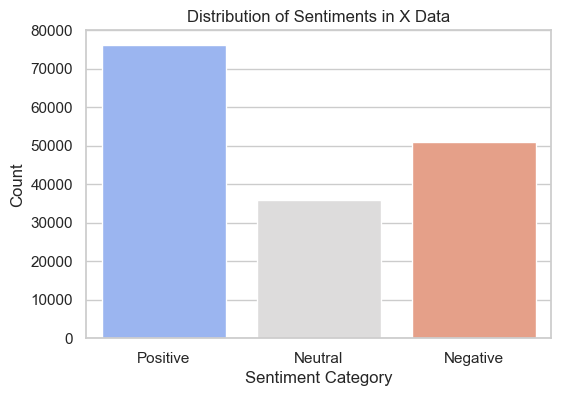

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme for better visuals
sns.set_theme(style="whitegrid")

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["sentiment"], palette="coolwarm", order=["Positive", "Neutral", "Negative"])

# Add labels
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.title("Distribution of Sentiments in X Data")

# Show plot
plt.show()


In [8]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



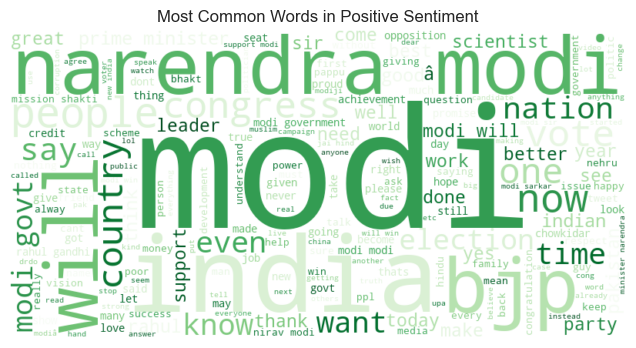

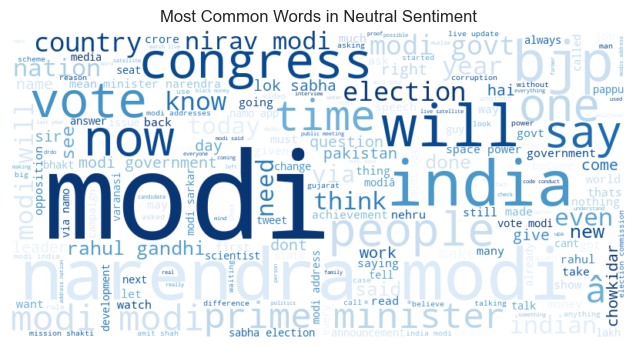

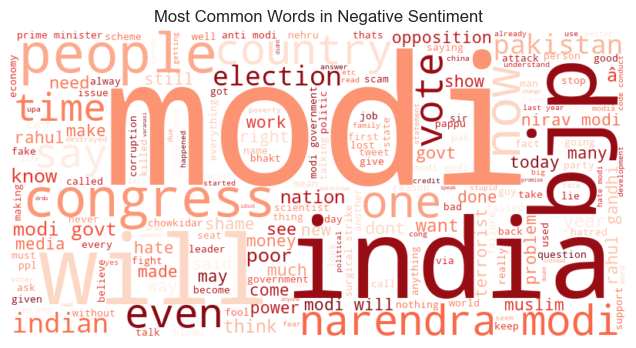

In [9]:
from wordcloud import WordCloud

# Function to generate and display word clouds
def generate_wordcloud(sentiment, color):
    text = " ".join(df[df["sentiment"] == sentiment]["cleaned_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap=color).generate(text)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Most Common Words in {sentiment} Sentiment")
    plt.show()

# Generate word clouds for each sentiment category
generate_wordcloud("Positive", "Greens")
generate_wordcloud("Neutral", "Blues")
generate_wordcloud("Negative", "Reds")


In [10]:
df.to_csv("sentiment_analysis_results.csv", index=False)
print("Sentiment analysis results saved successfully!")


Sentiment analysis results saved successfully!
